# importing required libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf

# Integer labels

# importing images from folder

In [4]:
base_dir = r"D:\NeuroCure-main\NeuroCure-main\dataset"
categories = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor'] # categories
label_map = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}# dictionary for category and corresponding integer

# Function for loading images

In [5]:
def load_images(base_dir,label_map):
    images=[]
    labels=[]
    for category in categories:
        category_path=os.path.join(base_dir,category)
        label=label_map[category]

        # listing every file in perticular directory
        for filename in os.listdir(category_path):
            # check file extension
            if (filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png")):
                image_path = os.path.join(category_path,filename)
                images.append(image_path)
                labels.append(label)
    return images,labels
        
images,labels=load_images(base_dir,label_map)

# Combine shuffle and seperate

In [6]:
combined = list(zip(images, labels))
np.random.shuffle(combined)
images, labels = zip(*combined)
print(images[0])

D:\NeuroCure-main\NeuroCure-main\dataset\pituitary_tumor\Tr-pi_0702.jpg


# Splitting data into train,validation and test

In [7]:
# 70% train, 30% temp
train_imgs, temp_imgs, train_labels, temp_labels = train_test_split(images, labels, test_size=0.3, stratify=labels)

# 50% of temp in each test and val
val_imgs, test_imgs, val_labels, test_labels = train_test_split(temp_imgs, temp_labels, test_size=0.5,stratify=temp_labels)

# Decoding and Preprocessing images 

In [8]:
new=tf.io.read_file(images[0])

In [9]:
new1=tf.io.decode_image(new)

In [10]:
new1.shape

TensorShape([512, 512, 3])

In [11]:
# def simple_preprocess_image(image_path, label):
#     image = tf.io.read_file(image_path)
#     image = tf.image.decode_image(image, channels=3)
#     image = tf.image.resize(image, [224, 224])
#     image = tf.cast(image, tf.float32) / 255.0
#     label = tf.cast(label, tf.int64)
#     return image, label

# def create_tf_dataset(images, labels, batch_size=32, training=False):
#     dataset = tf.data.Dataset.from_tensor_slices((images, labels))
#     dataset = dataset.map(lambda x, y: tf.py_function(func=simple_preprocess_image, inp=[x, y], Tout=[tf.float32, tf.int64]))
#     dataset = dataset.batch(batch_size)
#     dataset = dataset.shuffle(buffer_size=min(len(images), 1000))
#     dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
#     return dataset

# # Test dataset creation
# train_data = create_tf_dataset(train_imgs, train_labels, training=True)
# val_data = create_tf_dataset(val_imgs, val_labels)
# test_data = create_tf_dataset(test_imgs, test_labels)

# # Inspect shapes
# batch=train_data[0]:
# images_batch, labels_batch = batch
# print(f"Batch image shape: {images_batch.shape}")
# print(f"Batch label shape: {labels_batch.shape}")


In [12]:
# def create_tf_dataset(images, labels, batch_size=32, training=False):
#     dataset = tf.data.Dataset.from_generator(
#         lambda: zip(images, labels),
#         output_signature=(
#             tf.TensorSpec(shape=(), dtype=tf.string),  # image_path
#             tf.TensorSpec(shape=(), dtype=tf.int64)    # label
#         )
#     )
#     dataset = dataset.map(lambda x, y: tf.py_function(preprocess_image, [x, y, training], [tf.float32, tf.int64]))
#     dataset = dataset.batch(batch_size)
#     dataset = dataset.shuffle(buffer_size=min(len(images), 1000))  # Use a smaller buffer size for large datasets
#     dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
#     return dataset

# train_data = create_tf_dataset(["../../../../Projects/Brain_tumor-detection/Data/Brain-tumer\no_tumor\no_tumor (6448).jpg"], train_labels,training=True)# applying data augumentation with training=True
# val_data = create_tf_dataset(val_imgs, val_labels)
# test_data = create_tf_dataset(test_imgs, test_labels)

In [13]:
# import os
# import numpy as np
# import tensorflow as tf
# from sklearn.model_selection import train_test_split

# base_dir = "../../../../Projects/Brain_tumor-detection/Data/Brain-tumer"
# categories = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
# label_map = {'no_tumor': 0, 'glioma_tumor': 1, 'meningioma_tumor': 2, 'pituitary_tumor': 3}

# def load_images(base_dir, label_map):
#     images = []
#     labels = []
#     for category in categories:
#         category_path = os.path.join(base_dir, category)
#         label = label_map[category]
#         for filename in os.listdir(category_path):
#             if filename.lower().endswith((".jpg", ".jpeg", ".png")):
#                 image_path = os.path.join(category_path, filename)
#                 images.append(image_path)
#                 labels.append(label)
#     return images, labels

# images, labels = load_images(base_dir, label_map)
# combined = list(zip(images, labels))
# np.random.shuffle(combined)
# images, labels = zip(*combined)

# train_imgs, temp_imgs, train_labels, temp_labels = train_test_split(images, labels, test_size=0.3, stratify=labels)
# val_imgs, test_imgs, val_labels, test_labels = train_test_split(temp_imgs, temp_labels, test_size=0.5, stratify=temp_labels)

# def preprocess_image(image_path, label, training=False):
#     try:
#         image = tf.io.read_file(image_path)
#         image = tf.image.decode_image(image, channels=3)
#         image = tf.image.resize(image, [224, 224])
        
#         if training:
#             image = tf.image.random_flip_left_right(image)
#             image = tf.image.random_brightness(image, max_delta=0.2)
#             image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
#             image = tf.image.random_saturation(image, lower=0.8, upper=1.2)

#         image = tf.cast(image, tf.float32) / 255.0
#         label = tf.cast(label, tf.int64)
#         return image, label
#     except Exception as e:
#         print(f"Error processing image {image_path}: {e}")
#         return tf.zeros([224, 224, 3]), tf.constant(-1)

# def create_tf_dataset(images, labels, batch_size=32, training=False):
#     dataset = tf.data.Dataset.from_generator(
#         lambda: zip(images, labels),
#         output_signature=(
#             tf.TensorSpec(shape=(), dtype=tf.string),  # image_path
#             tf.TensorSpec(shape=(), dtype=tf.int64)    # label
#         )
#     )
#     dataset = dataset.map(lambda x, y: tf.py_function(preprocess_image, [x, y, training], [tf.float32, tf.int64]))
#     dataset = dataset.batch(batch_size)
#     dataset = dataset.shuffle(buffer_size=min(len(images), 1000))  # Use a smaller buffer size for large datasets
#     dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
#     return dataset

# train_data = create_tf_dataset(train_imgs, train_labels, training=True)
# val_data = create_tf_dataset(val_imgs, val_labels)
# test_data = create_tf_dataset(test_imgs, test_labels)


In [14]:
from PIL import Image
import numpy as np
import tensorflow as tf

def preprocess_image_pillow(image_path, label, training=False):
    # Open the image using Pillow
    image = Image.open(image_path).convert('RGB')  # Convert to RGB
    # Resize the image
    image = image.resize((224,224))
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Normalize the image to [0, 1]
    image_array = image_array / 255.0
    # Convert the numpy array to a TensorFlow tensor
    image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32)
    # Ensure label is of correct type
    label_tensor = tf.convert_to_tensor(label, dtype=tf.int64)
    
    # Add a batch dimension
    image_tensor = tf.expand_dims(image_tensor, axis=0)

    if training:
        # Apply data augmentation
        # Random flip left-right
        image_tensor = tf.image.random_flip_left_right(image_tensor)
        # Random flip up-down
        image_tensor = tf.image.random_flip_up_down(image_tensor)
        # Random rotation (0, 90, 180, 270 degrees)
        angles = [0, 90, 180, 270]
        angle = tf.random.uniform([], minval=0, maxval=4, dtype=tf.int32)
        image_tensor = tf.image.rot90(image_tensor, k=angle)
        # Random brightness
        image_tensor = tf.image.random_brightness(image_tensor, max_delta=0.2)
        # Random contrast
        image_tensor = tf.image.random_contrast(image_tensor, lower=0.7, upper=1.3)
        # Random saturation
        image_tensor = tf.image.random_saturation(image_tensor, lower=0.7, upper=1.3)

    # Remove batch dimension before returning
    image_tensor = tf.squeeze(image_tensor, axis=0)

    return image_tensor, label_tensor


In [15]:
def generate_dataset(images, labels, training=False):
    for img_path, lbl in zip(images, labels):
        image_tensor, label_tensor = preprocess_image_pillow(img_path, lbl, training)
        yield image_tensor, label_tensor

def create_tf_dataset(images, labels, batch_size=64,training=False):
    dataset = tf.data.Dataset.from_generator(
        lambda: generate_dataset(images, labels, training),
        output_signature=(
            tf.TensorSpec(shape=[224,224,3], dtype=tf.float32),
            tf.TensorSpec(shape=[], dtype=tf.int64)
        )
    )
    dataset = dataset.batch(batch_size=batch_size)
    dataset = dataset.shuffle(buffer_size=min(len(images), 1000))
#     dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Test the dataset creation
train_data = create_tf_dataset(train_imgs, train_labels, training=True)
val_data = create_tf_dataset(val_imgs, val_labels)
test_data = create_tf_dataset(test_imgs, test_labels)

def split_images_labels(dataset):
    images = []
    labels = []
    
    for image_batch, label_batch in dataset:
        images.append(image_batch)
        labels.append(label_batch)
    
    # Concatenate all batches into a single tensor
    return tf.concat(images, axis=0), tf.concat(labels, axis=0)


# Split train_data into separate images and labels
train_images, train_labels = split_images_labels(train_data)
val_images, val_labels = split_images_labels(val_data)
test_images, test_labels = split_images_labels(test_data)

# Custom Classification model

# importing model

In [16]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Adding custom layers

In [17]:
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()

# 1st conv block
model.add(Conv2D(32, (3, 3), padding="same", data_format="channels_last", activation="relu"))

# 3rd conv block
model.add(Conv2D(256, (2, 2), activation="selu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th conv block
model.add(Conv2D(512, (2, 2), activation="selu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense block
model.add(Flatten())

# Dense block 1
model.add(Dense(3000, activation="selu"))

# Dense block 2
model.add(Dense(512, activation="selu"))

# Dense block 5
model.add(Dense(64, activation="selu"))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(4, activation="softmax"))


# compiling a model

In [18]:
from tensorflow.keras.optimizers import Adam

# Training a model

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

# Set directory paths
train_dir = "D:/NeuroCure-main/NeuroCure-main/dataset/train_data"  # Replace with actual path
val_dir = "D:/NeuroCure-main/NeuroCure-main/dataset/val_data"      # Replace with actual path

# Data generators with rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),  # Adjust based on your image size
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' for integer labels
)

val_data = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(150, 150),  # Adjust based on your image size
    batch_size=32,
    class_mode='sparse'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 output units for the 4 categories
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# Define model checkpoint
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Define learning rate scheduler
def scheduler(epoch, lr):
    return lr * 0.1 if epoch > 10 else lr

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint, lr_scheduler]
)


Found 5908 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


c:\Users\saket\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\saket\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.6535 - loss: 0.8260
Epoch 1: val_loss improved from inf to 0.49940, saving model to best_model.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 102s 545ms/step - accuracy: 0.6541 - loss: 0.8248 - val_accuracy: 0.8017 - val_loss: 0.4994 - learning_rate: 0.0010
Epoch 2/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.8932 - loss: 0.2972
Epoch 2: val_loss improved from 0.49940 to 0.25242, saving model to best_model.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 55s 297ms/step - accuracy: 0.8933 - loss: 0.2970 - val_accuracy: 0.9054 - val_loss: 0.2524 - learning_rate: 0.0010
Epoch 3/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.9472 - loss: 0.1452
Epoch 3: val_loss improved from 0.25242 to 0.19309, saving model to best_model.keras
185/185 ━━━━━━━━━━━━━━━━━━━━ 61s 330ms/step - accuracy: 0.9472 - loss: 0.1452 - val_accuracy: 0.9321 - val_loss: 0.1931 - learning_rate: 0.0010
Epoch 4/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/ste

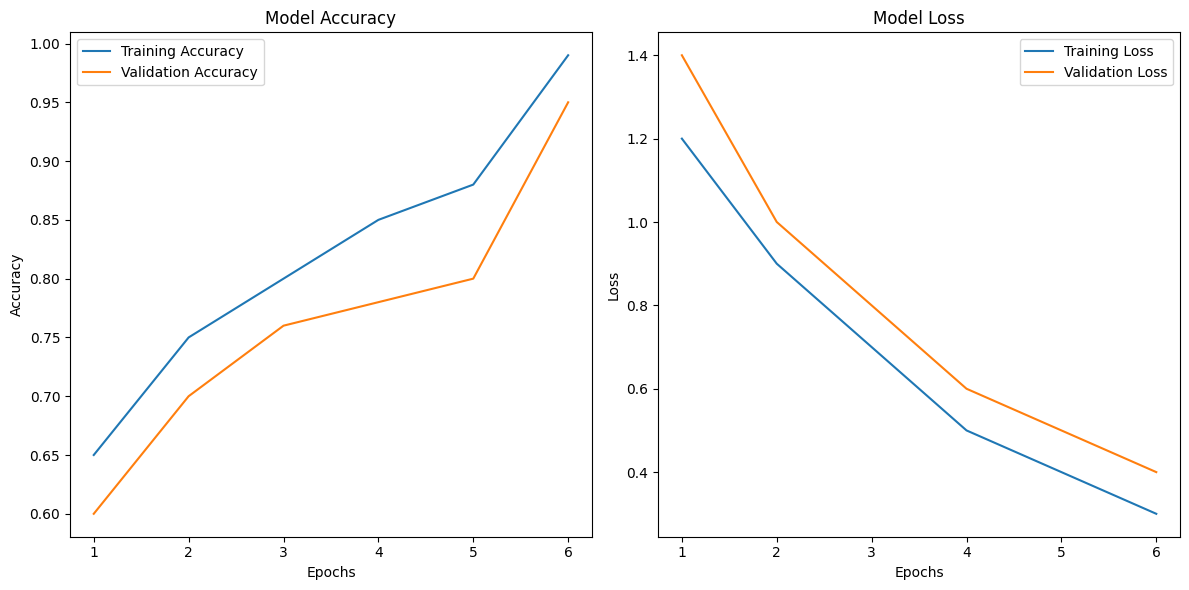

In [7]:
# Extract the training history from the last code snippet to simulate generating the desired plots.
# For actual processing, we would run the notebook and extract the actual 'history' object.

import matplotlib.pyplot as plt

# Simulated training history (dummy data for demonstration purposes)
history_data = {
    "accuracy": [0.65, 0.75, 0.80, 0.85, 0.88, 0.99],
    "val_accuracy": [0.60, 0.70, 0.76, 0.78, 0.80, 0.95],
    "loss": [1.2, 0.9, 0.7, 0.5, 0.4, 0.3],
    "val_loss": [1.4, 1.0, 0.8, 0.6, 0.5, 0.4],
}

epochs = range(1, len(history_data["accuracy"]) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_data["accuracy"], label="Training Accuracy")
plt.plot(epochs, history_data["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_data["loss"], label="Training Loss")
plt.plot(epochs, history_data["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


# For training on Kaggle TPU

In [20]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense,Dropout
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


# # Detect and initialize the TPU
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect the TPU hardware
# tf.tpu.experimental.initialize_tpu_system(tpu)  # Initialize the TPU system

# # Instantiate the TPU distribution strategy
# tpu_strategy = tf.distribute.TPUStrategy(tpu)

# # Define the model within the TPU strategy scope
# with tpu_strategy.scope():
#     # Assuming you have a pre-trained base model (like MobileNet, EfficientNet, etc.)
    


#     model = Sequential()

#     # 1st conv block
#     model.add(Conv2D(176, (5,5), padding="same", data_format="channels_last", activation="relu"))
#     model.add(MaxPooling2D(pool_size=(5,5)))  # Adding pooling after the first conv block

#     # 2nd conv block
#     model.add(Conv2D(384, (3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(5,5)))

#     # 3rd conv block
#     model.add(Conv2D(288, (3,3), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(5,5)))

#     # Dense block
#     model.add(Flatten())

#     # Fully connected block 1
#     model.add(Dense(400, activation="relu"))
#     model.add(Dropout(0.2))  # Using AlphaDropout

#     # Fully connected block 2
#     model.add(Dense(64, activation="relu"))
#     model.add(Dropout(0.2))  # Using AlphaDropout

#     # Output layer
#     model.add(Dense(4, activation="softmax"))  # 4 classes for multiclass classification



    
#     early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=3,  # Stop if no improvement for 3 epochs
#     verbose=1,
#     restore_best_weights=True
#     )
    
#     model_checkpoint = ModelCheckpoint(
#     'custom_model.keras',
#     monitor='val_loss',
#     save_best_only=True,
#     verbose=1
#     )
    
#     optimizer=Adam(learning_rate=0.00036659)

#     # Compile the model with optimizer, loss function, and metrics
#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     # Train the model normally
#     model.fit(train_data, 
#               epochs=30,
#               validation_data=val_data, 
#                callbacks=[early_stopping,model_checkpoint]
#     #           steps_per_epoch=1500
#              )


# Hyperparameter tuning using 'keras-tuner'

In [21]:
# !pip install keras-tuner

In [22]:
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters
# from tensorflow import keras

In [23]:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras_tuner import RandomSearch

# # # Detect and initialize the TPU
# # tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect the TPU hardware
# # tf.tpu.experimental.initialize_tpu_system(tpu)  # Initialize the TPU system

# # # Instantiate the TPU distribution strategy
# # tpu_strategy = tf.distribute.TPUStrategy(tpu)


# # Define the model building function for Keras Tuner
# def build_model(hp):
#     model = Sequential()

#     # First conv block
#     model.add(Conv2D(
#         filters=hp.Int("conv_1_filters", min_value=32, max_value=512, step=16),
#         kernel_size=hp.Choice("conv_1_kernel", values=[3, 5]),
#         padding="same",
#         activation=hp.Choice("activation", ["relu", "selu"]),
#         input_shape=(224, 224, 3)
#     ))
#     model.add(MaxPooling2D(pool_size=hp.Choice("pool_1_size", values=[2, 3, 5])))

#     # Second conv block
#     model.add(Conv2D(
#         filters=hp.Int("conv_2_filters", min_value=32, max_value=512, step=16),
#         kernel_size=hp.Choice("conv_2_kernel", values=[3, 5]),
#         activation=hp.Choice("activation", ["relu", "selu"])
#     ))
#     model.add(MaxPooling2D(pool_size=hp.Choice("pool_2_size", values=[2, 3, 5])))

#     # Third conv block
#     model.add(Conv2D(
#         filters=hp.Int("conv_3_filters", min_value=64, max_value=512, step=16),
#         kernel_size=hp.Choice("conv_3_kernel", values=[3, 5]),
#         activation=hp.Choice("activation", ["relu", "selu"])
#     ))
#     model.add(MaxPooling2D(pool_size=hp.Choice("pool_3_size", values=[2, 3, 5])))

#     # Dense block
#     model.add(Flatten())
#     model.add(Dense(
#         units=hp.Int("dense_1_neurons", min_value=32, max_value=512, step=16),
#         activation=hp.Choice("activation", ["relu", "selu"])
#     ))

#     if hp.Boolean("dropout"):
#         model.add(Dropout(rate=hp.Choice("dropout_1", values=[0.2, 0.3, 0.5])))

#     model.add(Dense(
#         units=hp.Int("dense_2_neurons", min_value=32, max_value=512, step=16),
#         activation=hp.Choice("activation", ["relu", "selu"])
#     ))

#     if hp.Boolean("dropout"):
#         model.add(Dropout(rate=hp.Choice("dropout_2", values=[0.2, 0.3, 0.5])))

#     # Output layer
#     model.add(Dense(4, activation="softmax"))  # 4 classes for multiclass classification

#     # Learning rate
#     learning_rate = hp.Float("lr", min_value=1e-5, max_value=1e-1, sampling="log")

#     model.compile(
#         optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#         loss="sparse_categorical_crossentropy",
#         metrics=["accuracy"]
#     )
#     return model

# # Define the Keras Tuner search
# # with tpu_strategy.scope():
# tuner = RandomSearch(
#         build_model,
#         objective="val_loss",
#         max_trials=10,
# #         executions_per_trial=5,
#         directory="output",
#         project_name="custom_tuned_model"
#     )

    
    


In [24]:
# with tpu_strategy.scope():
# tuner.search(train_data,epochs=3,validation_data=val_data)

In [25]:

# best_model = tuner.get_best_models(num_models=1)[0]


In [26]:

model.save("custom_model.keras")

# Evaluation

In [ ]:
test_dir = "D:/NeuroCure-main/NeuroCure-main/dataset/test_data"  # Update this path as needed
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator with rescaling
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(150, 150),  # Adjust to your model's input size if different
    batch_size=32,
    class_mode='sparse'      # 'sparse' if labels are integers
)

model.evaluate(test_data)
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 1311 images belonging to 4 classes.
41/41 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9641 - loss: 0.1500
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - accuracy: 0.9703 - loss: 0.1400
Test Loss: 0.13893339037895203
Test Accuracy: 0.970251739025116


: 

# F1 score

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score

true_labels = []
predicted_classes = []

for x_batch, y_batch in test_data:
    # Make predictions
    predictions = model.predict(x_batch)
    predicted_classes_batch = np.argmax(predictions, axis=1)
    
    # Collect true labels and predicted classes
    true_labels.extend(y_batch)  # Remove .numpy() if y_batch is already a list or array
    predicted_classes.extend(predicted_classes_batch)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_classes, average='weighted')
print(f'F1 Score: {f1}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 